<a href="https://colab.research.google.com/github/MunSu2001/File/blob/main/2026_02_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_true = [0,0,0,0,0,1,1,1,2,2]

In [ ]:
y_pred = [0,0,0,0,1,0,1,2,1,2]

In [ ]:
print(classification_report(y_true, y_pred))

![image.png](attachment:c5af4b62-1314-4bcd-8154-90bdee1fc7a4.png)

In [ ]:
from sklearn.neighbors  import KNeighborsClassifier  # KN은 분류로만 사용 회귀로 사용할시 상한선이 제한될 수 있음
from sklearn.datasets import load_iris

In [ ]:
knn = KNeighborsClassifier()
knn.fit(load_iris().data, load_iris().target)

In [ ]:
knn.classes_

In [ ]:
knn.predict(load_iris().data)

In [ ]:
import pandas as pd
df = pd.read_csv("./data/credit_card_default.csv")

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.isnull().sum()

Unnamed: 0                      0
limit_bal                       0
sex                           150
education                     150
marriage                      150
age                           150
payment_status_sep              0
payment_status_aug              0
payment_status_jul              0
payment_status_jun              0
payment_status_may              0
payment_status_apr              0
bill_statement_sep              0
bill_statement_aug              0
bill_statement_jul              0
bill_statement_jun              0
bill_statement_may              0
bill_statement_apr              0
previous_payment_sep            0
previous_payment_aug            0
previous_payment_jul            0
previous_payment_jun            0
previous_payment_may            0
previous_payment_apr            0
default_payment_next_month      0
dtype: int64

In [ ]:
df

,Unnamed: 0,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,220000,NaN,High school,Married,39.0,Unknown,Unknown,Unknown,Unknown,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29996,150000,Male,High school,Single,43.0,Payed duly,Payed duly,Payed duly,Payed duly,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29997,30000,Male,University,Single,37.0,Payment delayed 4 months,Payment delayed 3 months,Payment delayed 2 months,Payed duly,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29998,80000,Male,High school,Married,41.0,Payment delayed 1 month,Payed duly,Unknown,Unknown,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
y = df.pop('default_payment_next_month')

In [ ]:
X = df.copy()

In [ ]:
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1]), array([23364,  6636]))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            30000 non-null  int64  
 1   limit_bal             30000 non-null  int64  
 2   sex                   29850 non-null  object 
 3   education             29850 non-null  object 
 4   marriage              29850 non-null  object 
 5   age                   29850 non-null  float64
 6   payment_status_sep    30000 non-null  object 
 7   payment_status_aug    30000 non-null  object 
 8   payment_status_jul    30000 non-null  object 
 9   payment_status_jun    30000 non-null  object 
 10  payment_status_may    30000 non-null  object 
 11  payment_status_apr    30000 non-null  object 
 12  bill_statement_sep    30000 non-null  int64  
 13  bill_statement_aug    30000 non-null  int64  
 14  bill_statement_jul    30000 non-null  int64  
 15  bill_statement_jun 

In [ ]:
X.head(3)

,Unnamed: 0,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,...,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
0,0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,...,689,0,0,0,0,689,0,0,0,0
1,1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


In [ ]:
X.describe(include='object')

,sex,education,marriage,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr
count,29850,29850,29850,30000,30000,30000,30000,30000,30000
unique,2,4,3,10,10,10,10,9,9
top,Female,University,Single,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
freq,18027,13960,15891,17496,19512,19849,20803,21493,21181


## 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- 남녀별 나이 분포

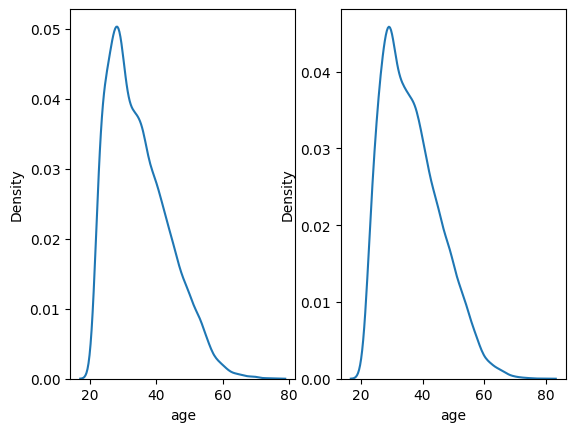

In [ ]:
fig, ax = plt.subplots(1,2)
# sns.histplot(df.loc[df.sex == 'Male', 'age'], ax=ax[0])
sns.kdeplot(df.loc[df.sex == 'Male', 'age'],  ax=ax[1])
sns.kdeplot(df.loc[df.sex == 'Female', 'age'], ax=ax[0])
plt.show()

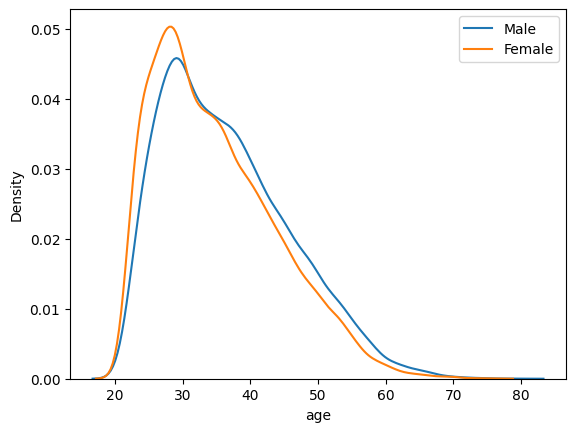

In [ ]:
fig, ax = plt.subplots()
# sns.histplot(df.loc[df.sex == 'Male', 'age'], ax=ax[0])
sns.kdeplot(df.loc[df.sex == 'Male', 'age'],  ax=ax, label = 'Male')
sns.kdeplot(df.loc[df.sex == 'Female', 'age'], ax=ax, label = 'Female')
ax.legend()
plt.show()

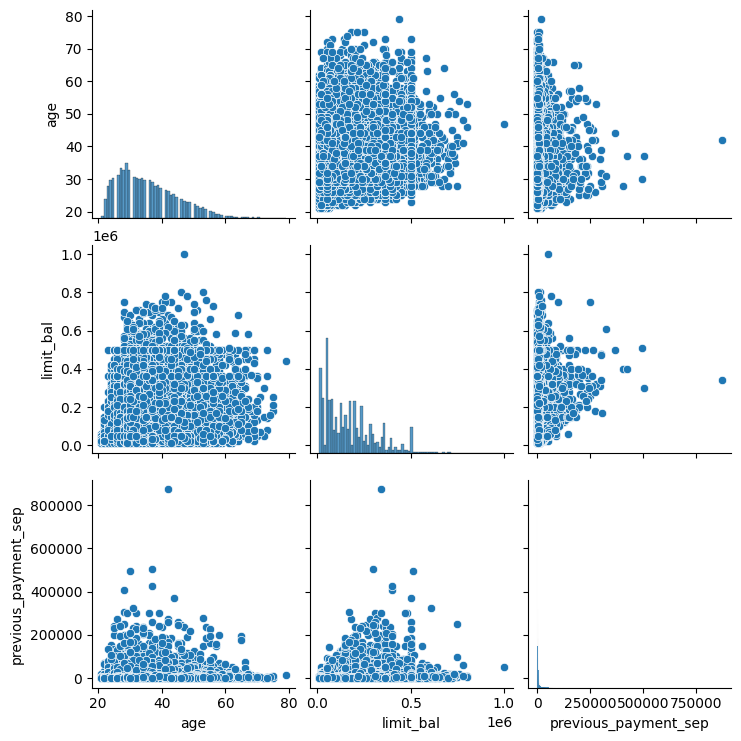

In [ ]:
pari_plot = sns.pairplot(df[['age', 'limit_bal', 'previous_payment_sep']])
plt.show()

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

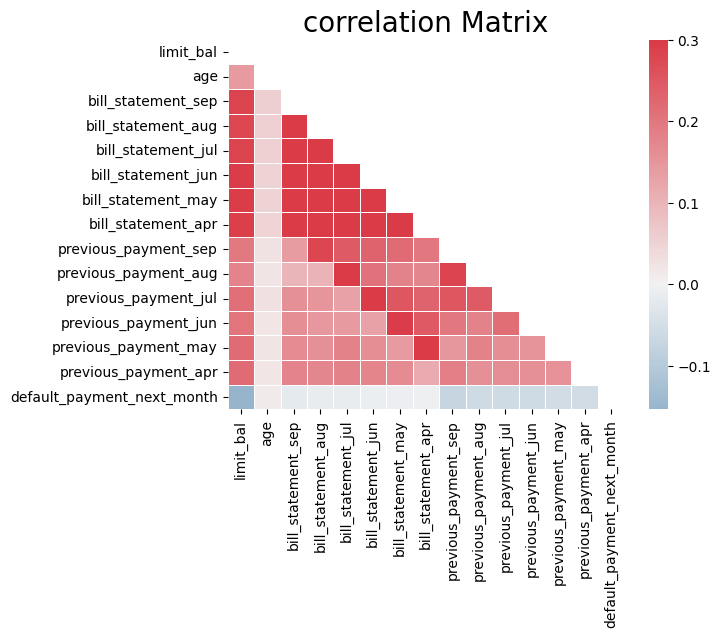

In [ ]:
# 상관계수 히트맵 그리기
import numpy as np
matrix_corr = pd.concat([df, y], axis=1).select_dtypes(include='number').corr()
mask = np.zeros_like(  matrix_corr    , dtype=bool)
mask[np.triu_indices_from(mask)] = True
#df.select_dtypes(include='number').corr()
fig, ax = plt.subplots()
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(matrix_corr, mask=mask, vmax=0.3, cmap=cmap,
            center=0, square=0, linewidths=0.5, ax = ax)
ax.set_title("correlation Matrix", fontsize=20)
plt.show()

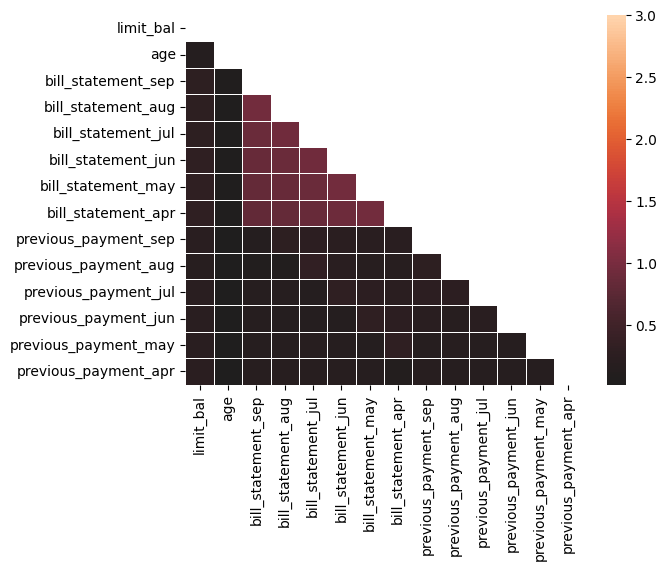

In [ ]:
# 상관계수 히트맵 그리기
import numpy as np
mask = np.zeros_like(df.select_dtypes(include = 'number').corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
# np.ones_like(df.select_dtypes(include = 'number').corr())
# df.select_dtypes(include = 'number').corr()
fig, ax = plt.subplots()
cmap = sns.diverging_palette(240, 10, n=8, as_cmap=True)
sns.heatmap(df.select_dtypes(include = 'number').corr(), mask=mask, vmax=3, center=0, square=0, linewidths=0.5, ax=ax)
plt.show()

In [ ]:
# 교육수준에 따른 파산에 영향을 시각화
pd.concat([df, y], axis=1).groupby(['education'])['default_payment_next_month'].count()

education
Graduate school    10537
High school         4886
Others               467
University         13960
Name: default_payment_next_month, dtype: int64

<Axes: xlabel='sex'>

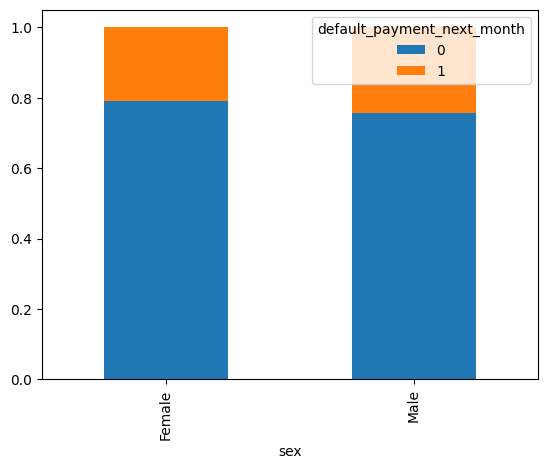

In [ ]:
# 교육수준에 따른 파산에 영향을 시각화
pd.concat([df, y], axis=1).groupby(['sex'])['default_payment_next_month'].value_counts(normalize=True).unstack().\
    plot(kind='bar', stacked=True)

In [ ]:
np.triu_indices_from(mask)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11,
        12, 12, 13]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13,  5,  6,  7,  8,  9, 10, 11, 12,
        13,  6,  7,  8,  9, 10, 11, 12, 13,  7,  8,  9, 10, 11, 12, 13,  8,
         9, 10, 11, 12, 13,  9, 10, 11, 12, 13, 10, 11, 12, 13, 11, 12, 13,
        12, 13, 13]))

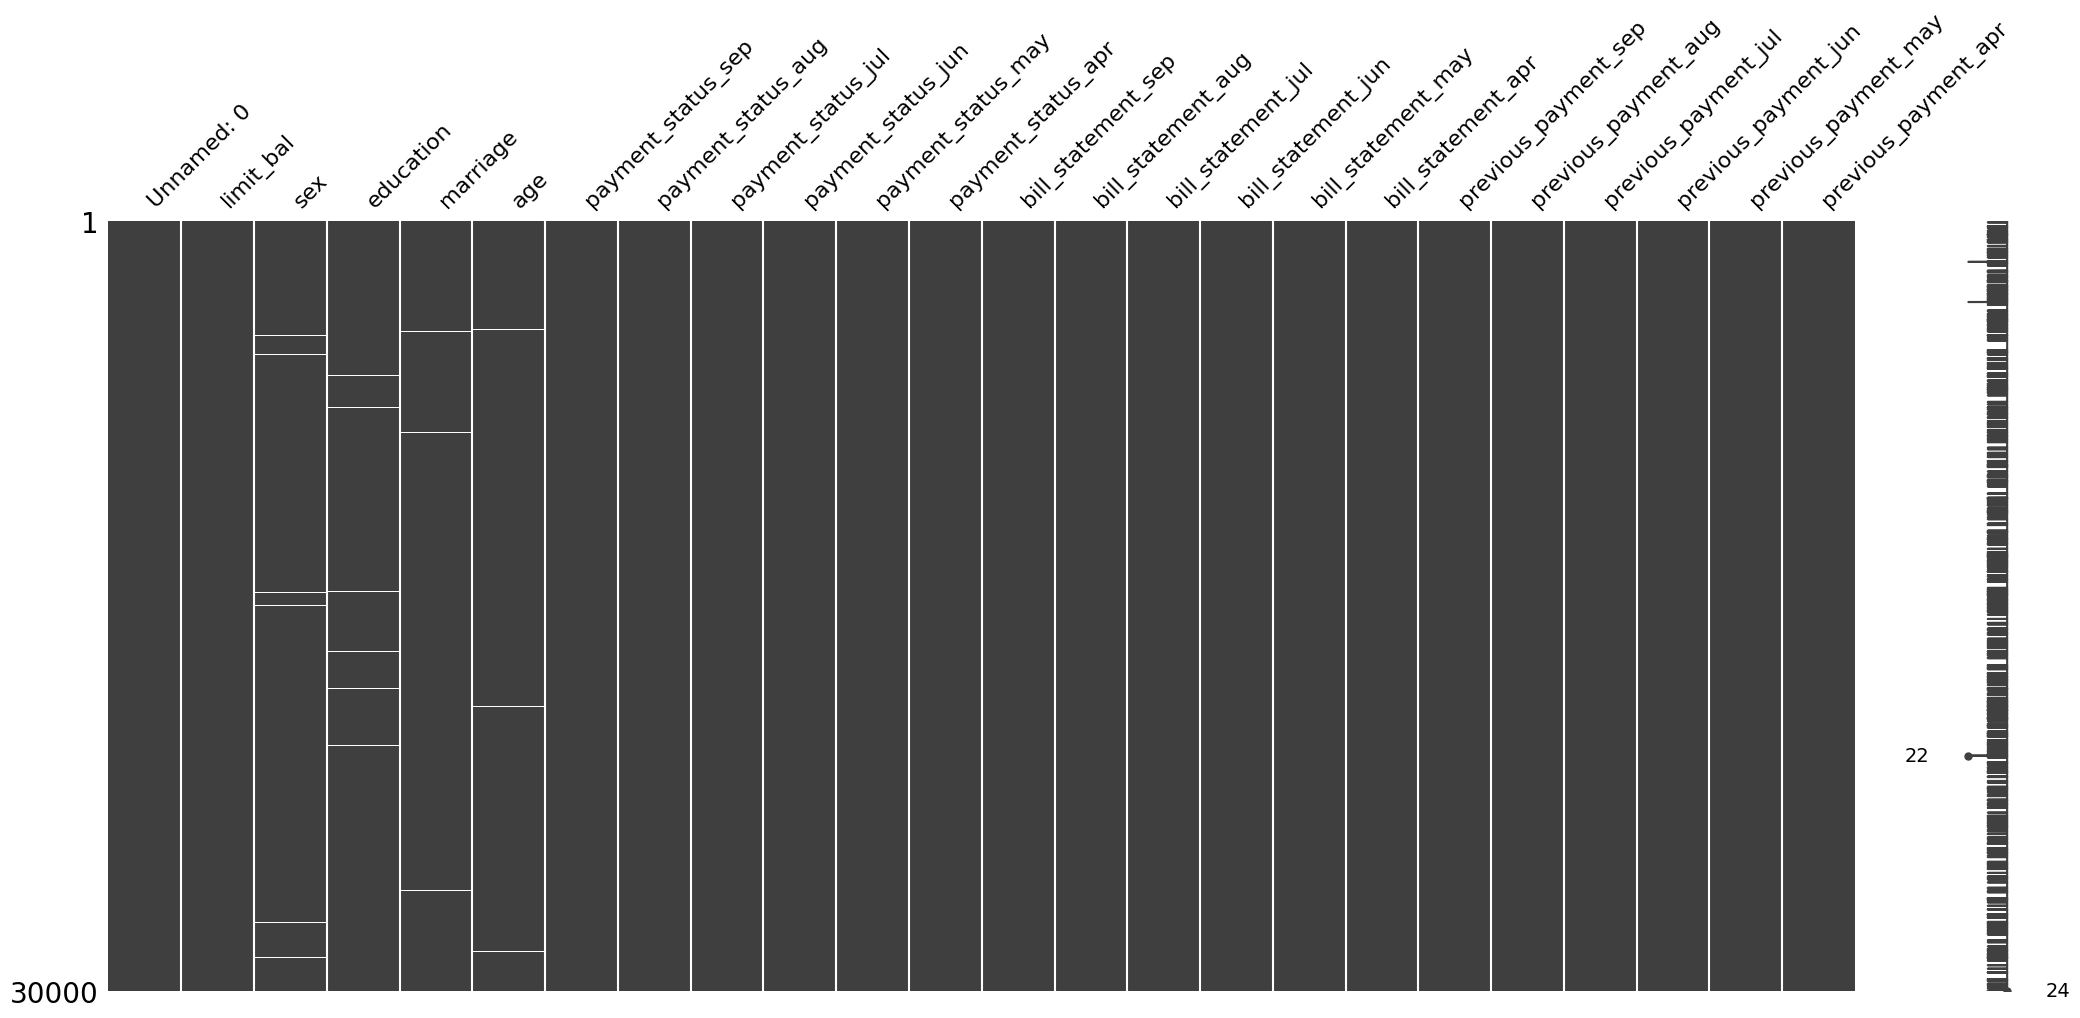

In [ ]:
# pip install missingno
import missingno
missingno.matrix(X)
plt.show()

<Axes: >

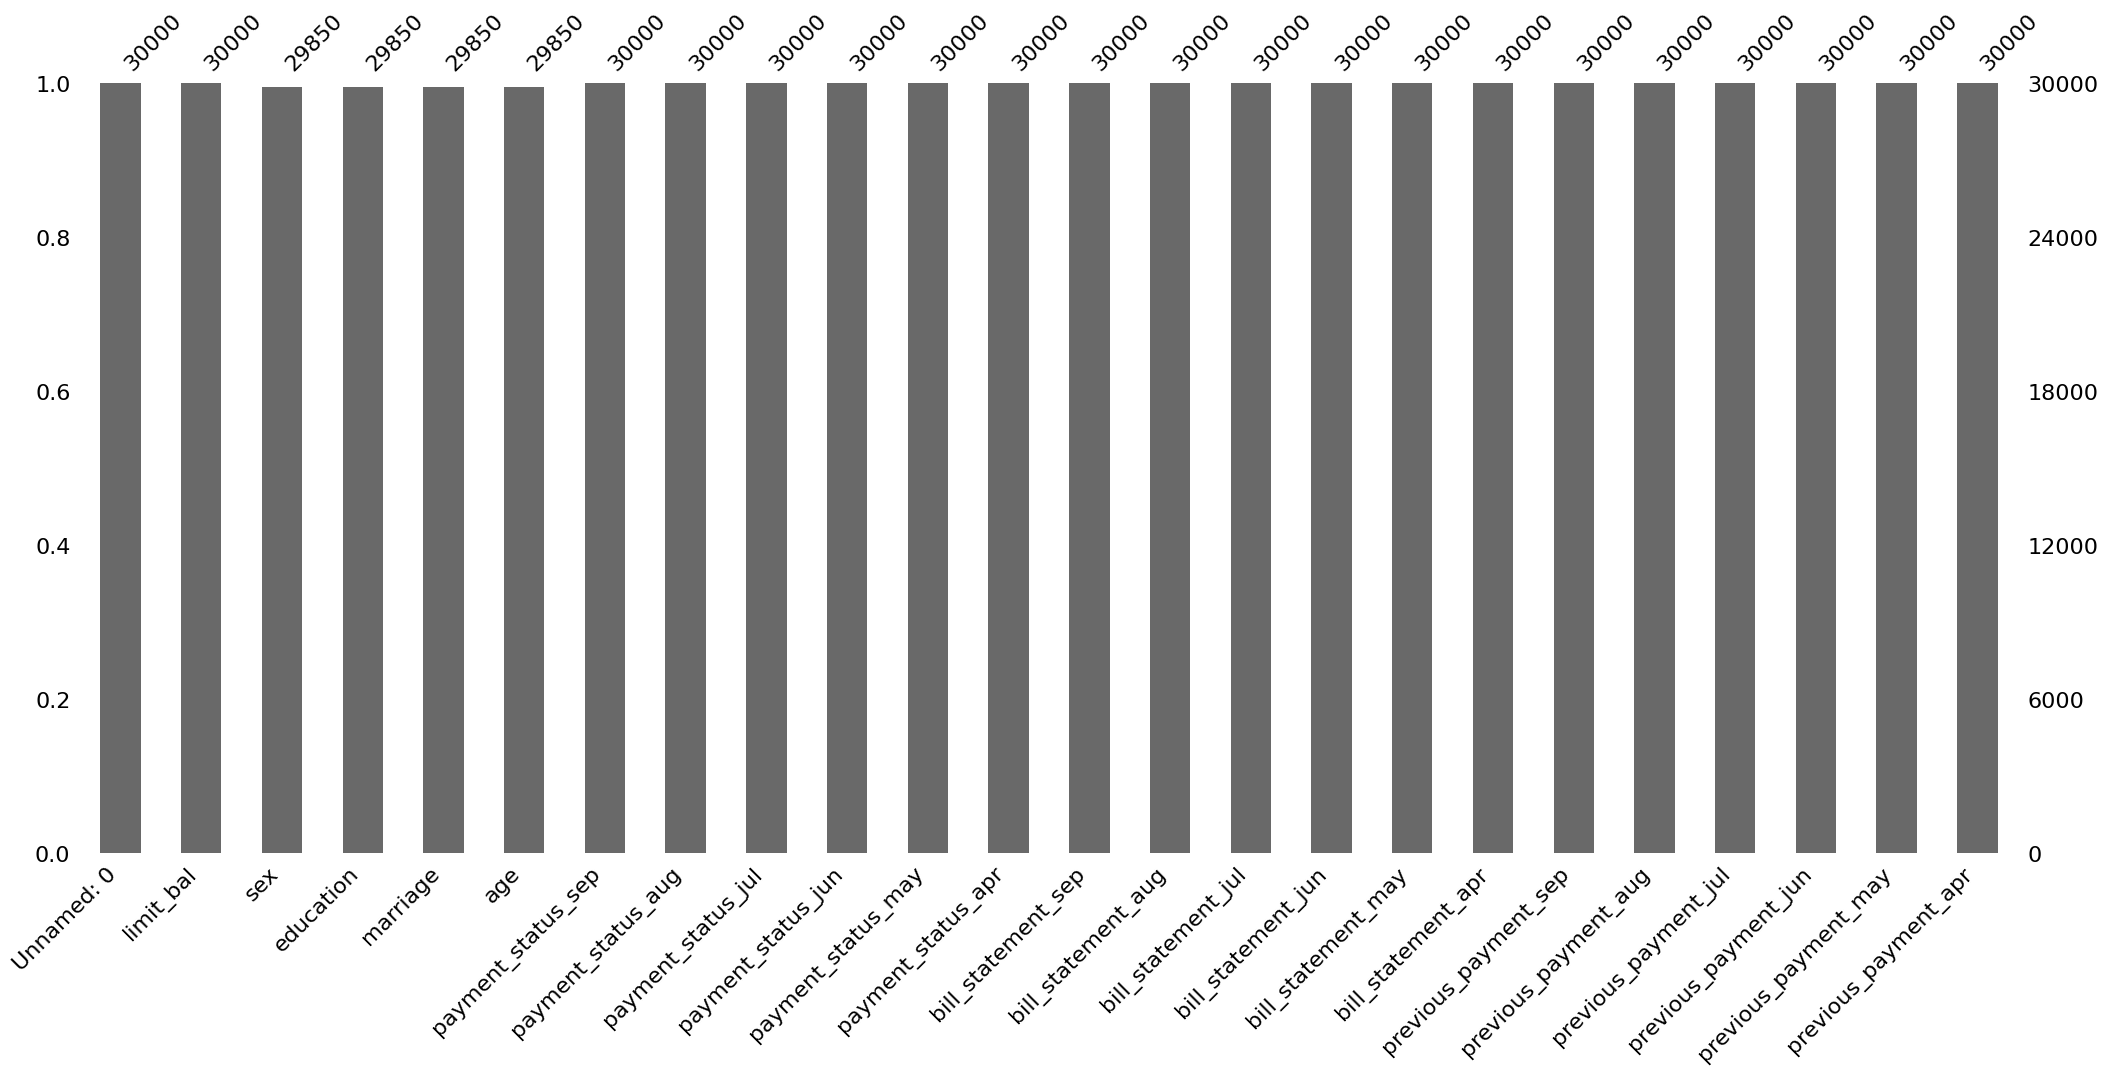

In [ ]:
missingno.bar(X)

In [ ]:
pip install category-encoders==2.6.3

  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import category_encoders

In [ ]:
target_en = category_encoders.TargetEncoder(smoothing=0)

In [ ]:
target_en.fit(X.sex, y)

AttributeError: 'TargetEncoder' object has no attribute '_get_tags'

In [ ]:
pd.concat([X.sex, target_en.transform(X.sex)], axis=1).iloc[:, 1].value_counts()

NotFittedError: Must train encoder before it can be used to transform data.

In [ ]:
num_features = ['age']
cat_features = ['sex', 'education', 'marriage']

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X[['age']])
no_missing_values = num_imputer.transform(X[['age']])

In [ ]:
X.loc[:, 'age_nomv'] = no_missing_values

In [ ]:
X.loc[X.age.isnull(), 'age_nomv']

201      34.0
434      34.0
505      34.0
530      34.0
543      34.0
         ... 
29129    34.0
29277    34.0
29534    34.0
29749    34.0
29884    34.0
Name: age_nomv, Length: 150, dtype: float64

In [ ]:
num_imputer = SimpleImputer(strategy='most_frequent')
num_imputer.fit(X[['sex']])
no_missing_values = num_imputer.transform(X[['sex']])

In [ ]:
import numpy as np
np.unique(no_missing_values, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([18177, 11823]))